flip class (EP 6-2)
2022-03-25

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

데이터 로딩

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data)
print(train_labels)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

단어와 정수index 를 매핑한 딕셔너리 +
정수index 와 단어를 매핑하도록 reverse

PCA #6 Prob1

In [ ]:
word_index = imdb.get_word_index()
# print(type(word_index))
# print((word_index.items()))
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index)
decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[131]])
print(decoded_review)

? i'm the sort of person who went down to the local library and read books on ? difference engine whilst my ? were playing football etc so if there is any such thing as a target audience for this film then i guess i'd probably be included in that br br maybe i just need to watch it again a previous reviewer mentioned not to watch this film whilst being tired maybe that was my mistake br br i tried my best to enjoy this film and there are aspects of it that i do like but overall i found it amateurish and quite plodding br br being somewhat of a self ? computer nerd i just can't help but pick up on the exact time frame when the movie was actually made and how the employed graphics reflect that time i e 1997 having played games of the era c f mind ? to ? one example this film cannot escape that 16 bit colour low ? ? explosion of that time now thankfully this has somewhat ? in more recent years in the ? world at least in favour of actual game play br br having to resort to watching this mo

Train data 내용 확인

In [ ]:
# for data in train_data:
#   print(data)
print(train_data[131])
print(train_data[131][53], train_data[131][26])

[1, 146, 4, 432, 7, 415, 37, 435, 180, 8, 4, 719, 3323, 5, 332, 1151, 23, 2, 1474, 7515, 1864, 61, 2, 71, 395, 2319, 525, 38, 48, 50, 9, 101, 141, 155, 17, 6, 2401, 311, 18, 14, 22, 95, 13, 482, 474, 242, 30, 1926, 11, 15, 10, 10, 279, 13, 43, 359, 8, 106, 12, 174, 6, 960, 2215, 1046, 24, 8, 106, 14, 22, 1864, 112, 1458, 279, 15, 16, 61, 1323, 10, 10, 13, 805, 61, 118, 8, 358, 14, 22, 5, 50, 26, 1409, 7, 12, 15, 13, 81, 40, 21, 444, 13, 258, 12, 2342, 5, 179, 7187, 10, 10, 112, 643, 7, 6, 532, 2, 1222, 5155, 13, 43, 191, 339, 21, 1261, 56, 23, 4, 2591, 58, 2122, 54, 4, 20, 16, 165, 93, 5, 89, 4, 5652, 2876, 4589, 15, 58, 13, 963, 5126, 260, 256, 1628, 7, 4, 999, 1148, 1209, 330, 2, 8, 2, 31, 463, 14, 22, 566, 1090, 15, 3248, 227, 3335, 364, 2, 2, 3938, 7, 15, 58, 150, 2670, 14, 47, 643, 2, 11, 53, 1136, 153, 11, 4, 2, 182, 33, 222, 11, 5260, 7, 779, 500, 297, 10, 10, 260, 8, 4713, 8, 149, 14, 20, 2864, 6, 1124, 2, 9529, 1308, 17, 13, 92, 104, 45, 126, 77, 3181, 23, 2285, 2, 248, 73, 24

PCA #6 Prob 2

In [ ]:
word_index_of_X = train_data[131][:5]
print(word_index_of_X)
print([reverse_word_index.get(i-3,'?') for i in word_index_of_X])
print(train_data[131][word_index_of_X[1]])
print(train_data[131][word_index_of_X[3]])

[1, 146, 4, 432, 7]
['?', "i'm", 'the', 'sort', 'of']
256
495


One-Hot encoding (vectorize)
for MNIST

In [ ]:
def to_one_hot(labels, dimension=10):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

vectorize_sequences

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

useage of vectorize_sequences()

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Model definition

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers, losses, metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # output = 0 or 1

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

slide. 13

실제 학습

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5358 - binary_accuracy: 0.7647 - val_loss: 0.4135 - val_binary_accuracy: 0.8540
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3186 - binary_accuracy: 0.9032 - val_loss: 0.3124 - val_binary_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2280 - binary_accuracy: 0.9257 - val_loss: 0.2853 - val_binary_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1751 - binary_accuracy: 0.9447 - val_loss: 0.3119 - val_binary_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1438 - binary_accuracy: 0.9557 - val_loss: 0.3434 - val_binary_accuracy: 0.8690
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1193 - binary_accuracy: 0.9635 - val_loss: 0.2943 - val_binary_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - los

array([[2.3705959e-03],
       [9.9999934e-01],
       [8.8963091e-01],
       ...,
       [6.8286061e-04],
       [5.2028596e-03],
       [7.9742026e-01]], dtype=float32)

multiple?

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labesl), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

실제 학습

In [ ]:
# x_val = x_train[:10000]
# partial_x_train = x_train[10000:]
# y_val = one_hot_train_labels[:10000]
# partial_y_train = one_hot_train_labels[10000:]

# history = model.fit(partial_x_train, partial_y_train,
#                     epochs=20, batch_size=512,
#                     validation_data=(x_val, y_val),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=1)])

# results = model.evaluate(x_test, one_hot_test_labels)
# print(results)

Comparing with the random baseline

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
accuracy = float(np.sum(hits_array)) / len(test_labels)
print(accuracy)

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

0.182546749777382
71/71 [==============================] - 0s 3ms/step - loss: 3.8342 - accuracy: 0.0125
[3.834212303161621, 0.012466607615351677]


prediction

In [ ]:
predictions = model.predict(x_test)
print(predictions)
print(predictions[131])

[[0.01982643 0.02082737 0.02378967 ... 0.02101765 0.02325624 0.0238867 ]
 [0.01586189 0.01806939 0.02189526 ... 0.01891955 0.02864642 0.02139173]
 [0.01876013 0.01965798 0.02503995 ... 0.01989857 0.02270202 0.02217202]
 ...
 [0.02149346 0.02220994 0.02294303 ... 0.02284205 0.02230521 0.0217622 ]
 [0.01846733 0.02247059 0.02096078 ... 0.0197849  0.02197768 0.02124557]
 [0.0185342  0.02056142 0.02202497 ... 0.01983151 0.02510734 0.02222323]]
[0.02174652 0.02159332 0.02265235 0.02218236 0.02186201 0.02122335
 0.02148798 0.02113483 0.02184281 0.02206325 0.02103264 0.02134297
 0.02223257 0.02219741 0.02155732 0.02153651 0.02228102 0.02183988
 0.02172447 0.02104424 0.02149319 0.02190262 0.02194788 0.02118128
 0.02186505 0.02209815 0.02207518 0.0212336  0.02175779 0.02121704
 0.02091951 0.02187008 0.0214637  0.02196855 0.02253908 0.02115246
 0.02166519 0.02164785 0.02166298 0.0216235  0.02184265 0.02164876
 0.02250387 0.02210421 0.02187583 0.0221622 ]


NN의 결과 확인

[0.02174652 0.02159332 0.02265235 0.02218236 0.02186201 0.02122335
 0.02148798 0.02113483 0.02184281 0.02206325 0.02103264 0.02134297
 0.02223257 0.02219741 0.02155732 0.02153651 0.02228102 0.02183988
 0.02172447 0.02104424 0.02149319 0.02190262 0.02194788 0.02118128
 0.02186505 0.02209815 0.02207518 0.0212336  0.02175779 0.02121704
 0.02091951 0.02187008 0.0214637  0.02196855 0.02253908 0.02115246
 0.02166519 0.02164785 0.02166298 0.0216235  0.02184265 0.02164876
 0.02250387 0.02210421 0.02187583 0.0221622 ]
<class 'numpy.ndarray'>


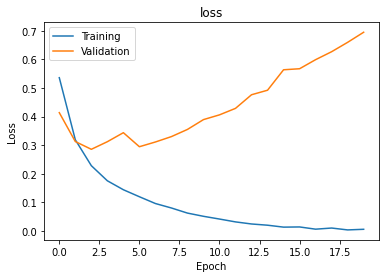

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(h, title="loss"):
  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc=0)

plot_loss(history)
predictions = model.predict(x_test)
print(predictions[131])
print(type(predictions[131]))